In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL']

# Set up End and Start times for data grab
tech_list = ['AAPL']

end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100,APPLE
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300,APPLE
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600,APPLE
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300,APPLE
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400,APPLE
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300,APPLE
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700,APPLE
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500,APPLE
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500,APPLE


In [2]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,147.566608,149.213099,146.003658,147.686036,146.204433,9.034922e+07
std,29.568158,29.653244,29.492900,29.583715,30.040559,4.320360e+07
min,60.700001,61.424999,59.742500,60.352501,58.861771,2.404830e+07
25%,129.192501,130.892498,127.762503,129.657501,127.636759,6.022898e+07
50%,148.864998,150.330002,147.455002,148.980003,147.282776,7.938320e+07
75%,171.702503,173.387501,170.399998,172.092506,170.805080,1.077425e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,3.743368e+08


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-04-03 to 2024-04-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1006 non-null   float64
 1   High          1006 non-null   float64
 2   Low           1006 non-null   float64
 3   Close         1006 non-null   float64
 4   Adj Close     1006 non-null   float64
 5   Volume        1006 non-null   int64  
 6   company_name  1006 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


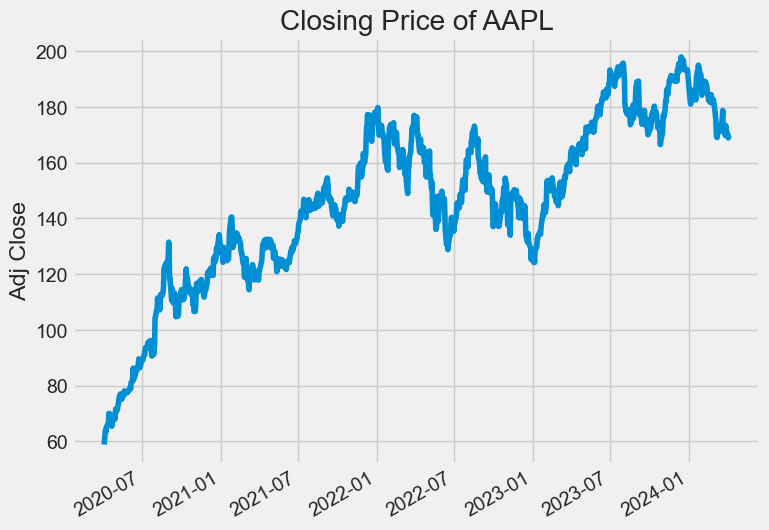

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

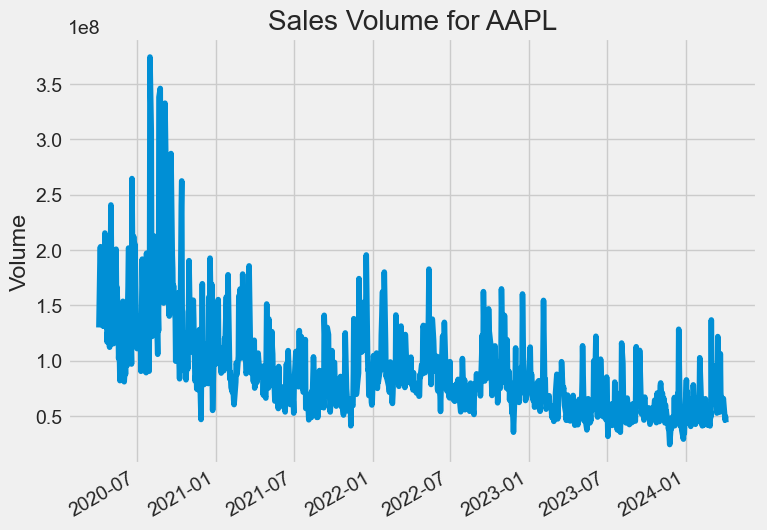

In [31]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

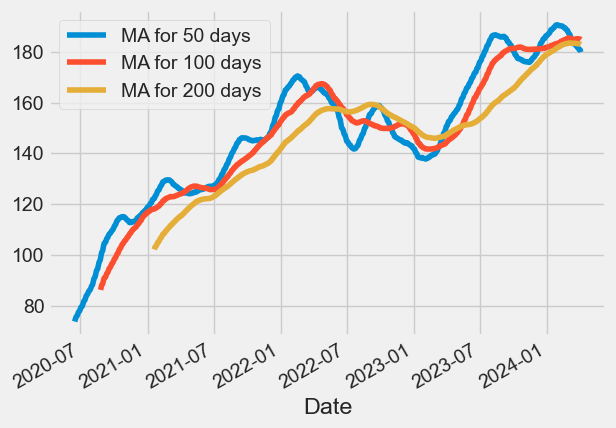

In [6]:
ma_day = [50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
AAPL[[ 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot()
plt.show()

In [25]:
# Assuming 'AAPL' is the DataFrame for the company AAPL and 'date_to_check' is the date you want to get the moving average values for
date_to_check = '2024-04-03'

# Replace 'AAPL' with the appropriate DataFrame for the company you want to check
moving_averages = AAPL.loc[date_to_check, ['MA for 50 days', 'MA for 100 days', 'MA for 200 days']]

print("Moving Averages for", date_to_check)
print(moving_averages)


Moving Averages for 2024-04-03
MA for 50 days     179.905099
MA for 100 days    184.848353
MA for 200 days    182.935101
Name: 2024-04-03 00:00:00, dtype: object


In [26]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2019-01-01', end='2024-04-10')
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075401,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530048,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450962,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200
...,...,...,...,...,...,...
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500


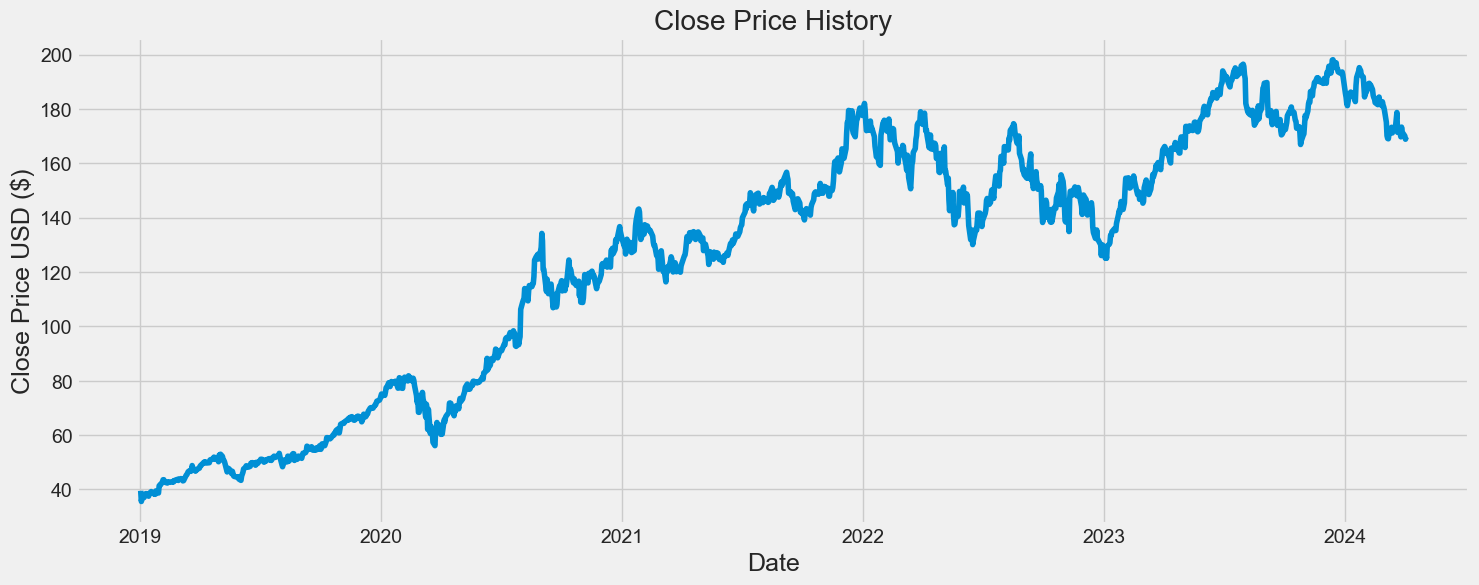

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1256

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02419069],
       [0.        ],
       [0.00933486],
       ...,
       [0.82726642],
       [0.81994615],
       [0.82492883]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.02249905, 0.01708574, 0.01803921,
       0.01616301, 0.02394462, 0.02169935, 0.01920798, 0.03546328,
       0.03729335, 0.03741638, 0.0446905 , 0.04919645, 0.04928874,
       0.04421376, 0.04339869, 0.04189157, 0.04413687, 0.04304497,
       0.04399846, 0.04341406, 0.04419837, 0.04589004, 0.0443983 ,
       0.04733564, 0.04927335, 0.04942714, 0.05025758, 0.04761244,
       0.05041138, 0.05176471, 0.05127258, 0.04971934, 0.04661284,
       0.04724337, 0.0564552 , 0.05954633, 0.06077663, 0.06388311,
       0.06755862, 0.07048059, 0.06818915, 0.07069589, 0.08135332,
       0.07514033, 0.07158786, 0.06858899, 0.07117262, 0.07155709])]
[0.0734486651393094]

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.022

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1196/1196 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0076


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


4.112626545237262

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_2612\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


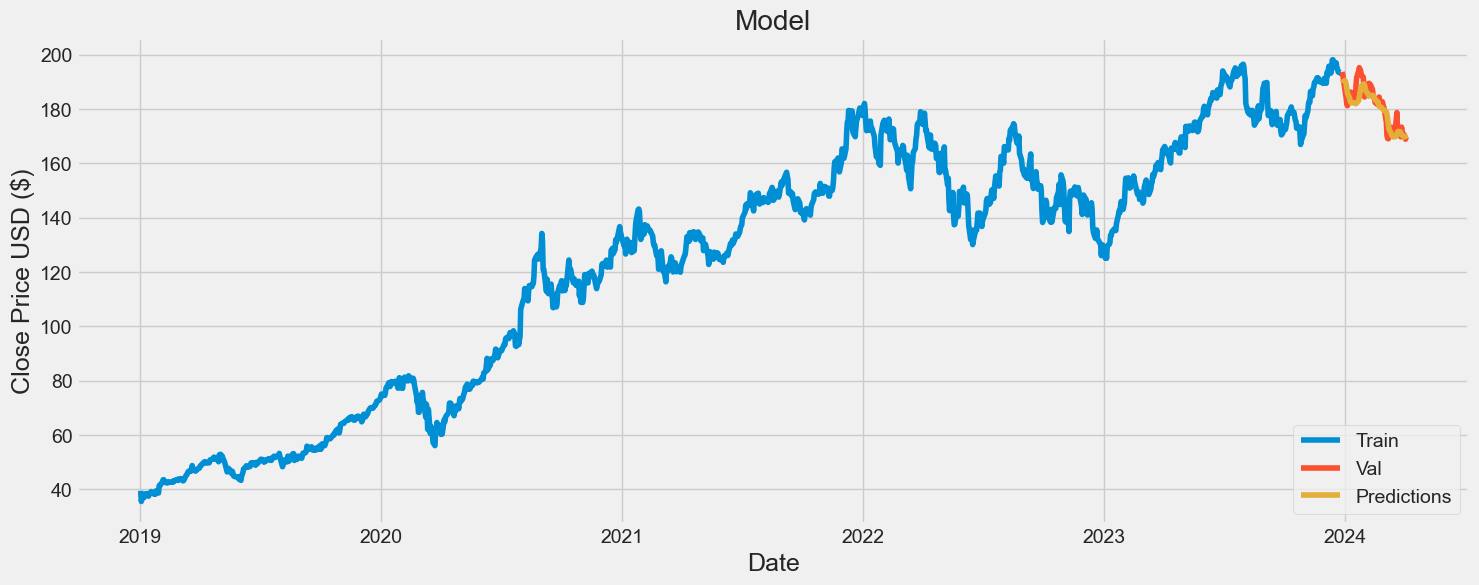

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
predictions_norm = scaler.transform(predictions)

In [18]:
x_test1 = []
for i in range(60, len(predictions_norm)):
    x_test1.append(predictions_norm[i-60:i, 0])
    
# Convert the data to a numpy array
x_test1 = np.array(x_test1)

# Reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model.predict(x_test1)
predictions2 = scaler.inverse_transform(predictions2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [19]:
predictions2_norm = scaler.transform(predictions2)

predictions_f = np.concatenate((predictions_norm, predictions2_norm), axis=0, out=None, dtype=None, casting="same_kind")

In [20]:
x_test2 = []
for i in range(60, len(predictions_f)):
    x_test2.append(predictions_f[i-60:i, 0])
    
# Convert the data to a numpy array
x_test2 = np.array(x_test2)

# Reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

# Get the models predicted price values 
predictionsf = model.predict(x_test2)
predictionsf = scaler.inverse_transform(predictionsf)
predictionsf.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


(12, 1)

In [23]:
dates_new = pd.bdate_range(start = '2024-04-04', periods = 12)
FinalPrediction = pd.concat([
    valid, pd.DataFrame({'Close': np.squeeze(predictionsf),'Predictions': np.squeeze(predictionsf)},index = dates_new)
], axis=0)

In [24]:
FinalPrediction.tail(12)

,Close,Predictions
2024-04-04,168.575546,168.575546
2024-04-05,168.721130,168.721130
2024-04-08,168.739853,168.739853
2024-04-09,168.654205,168.654205
2024-04-10,168.483994,168.483994
2024-04-11,168.239197,168.239197
2024-04-12,167.921173,167.921173
2024-04-15,167.564911,167.564911
2024-04-16,167.247437,167.247437
2024-04-17,166.987640,166.987640


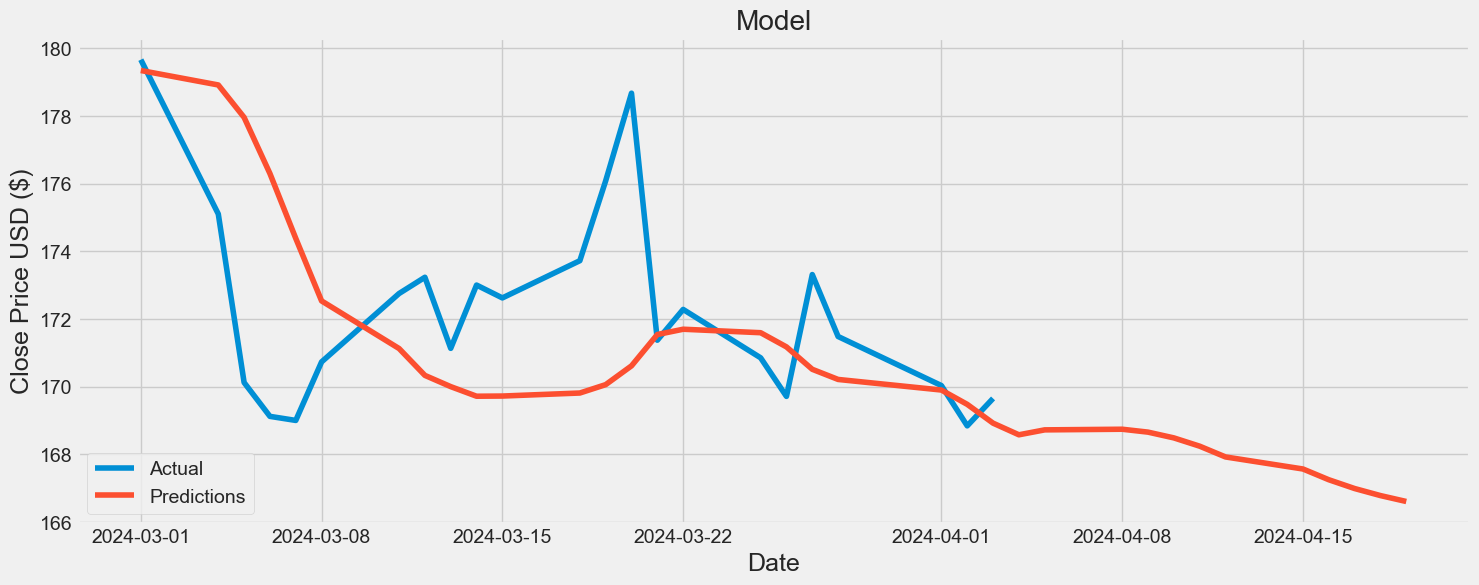

In [41]:
import matplotlib.pyplot as plt

# Specify the start date
start_date = '2024-03-01'

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Slicing the dataframes to start from the specified date
valid_subset = valid.loc[start_date:]
predictions_subset = FinalPrediction.loc[start_date:]

plt.plot(valid_subset['Close'])
plt.plot(predictions_subset[['Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower left')
plt.show()
